In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)

In [2]:
# Importing Datasets
movies_df = pd.read_csv('tmdb_5000_movies.csv')
credits_df = pd.read_csv('tmdb_5000_credits.csv')


print(movies_df.shape)
print(credits_df.shape)

(4803, 20)
(4803, 4)


In [3]:
# Display First Five Records of Movies Dataset
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
# Display First Five records of Credits dataset
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
# Merging both datasets
movies_df.rename(columns={'id':'movie_id'}, inplace=True)
combine_df = pd.merge(movies_df , credits_df , on='movie_id')
combine_df.drop(labels = ['title_x', 'title_y','homepage','original_language','spoken_languages','status'], axis=1, inplace=True)
combine_df.shape

(4803, 17)

In [6]:
# Checking Null Values in the dataset
combine_df.isnull().sum()

budget                    0
genres                    0
movie_id                  0
keywords                  0
original_title            0
overview                  3
popularity                0
production_companies      0
production_countries      0
release_date              1
revenue                   0
runtime                   2
tagline                 844
vote_average              0
vote_count                0
cast                      0
crew                      0
dtype: int64

In [7]:
# Getting First and Second star Cast name from column Cast
combine_df['cast_1'] = np.nan
combine_df['cast_2'] = np.nan

def get_cast_name(x):
    x = eval(x)
    if len(x) > 1:
        name_0 = (x)[0].get('name')
        name_1 = (x)[1].get('name')
        return pd.Series([name_0, name_1])
    elif len(x) == 1:
        name_0 = (x)[0].get('name')
        return pd.Series([name_0, 'NULL'])
    else :
        return pd.Series(['NULL', 'NULL'])
        
combine_df[['cast_1', 'cast_2']] = combine_df['cast'].apply(lambda x : get_cast_name(x))

In [8]:
all_genres = []
def get_genres(x):
    genres = []
    x = eval(x)
    for i in np.arange(len(x)):
        name = x[i].get('name')
        genres.append(name)
        all_genres.append(name)
    return genres
combine_df['genres_1'] = combine_df['genres'].apply(lambda x : get_genres(x))

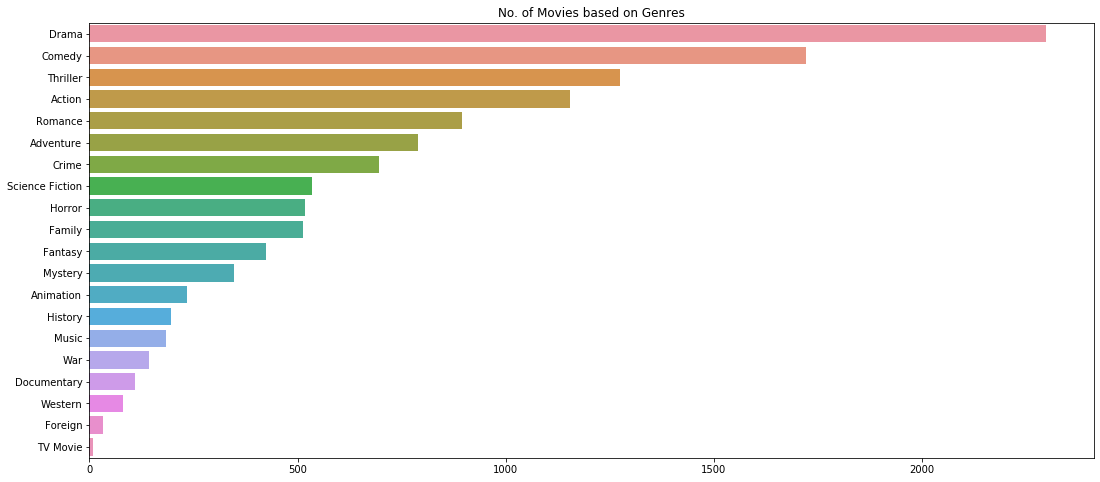

In [9]:
genres_count = pd.Series(all_genres).value_counts()
plt.figure(figsize=(18,8))
sns.barplot(y = genres_count.index, x=genres_count.values)
plt.title("No. of Movies based on Genres")
plt.show()

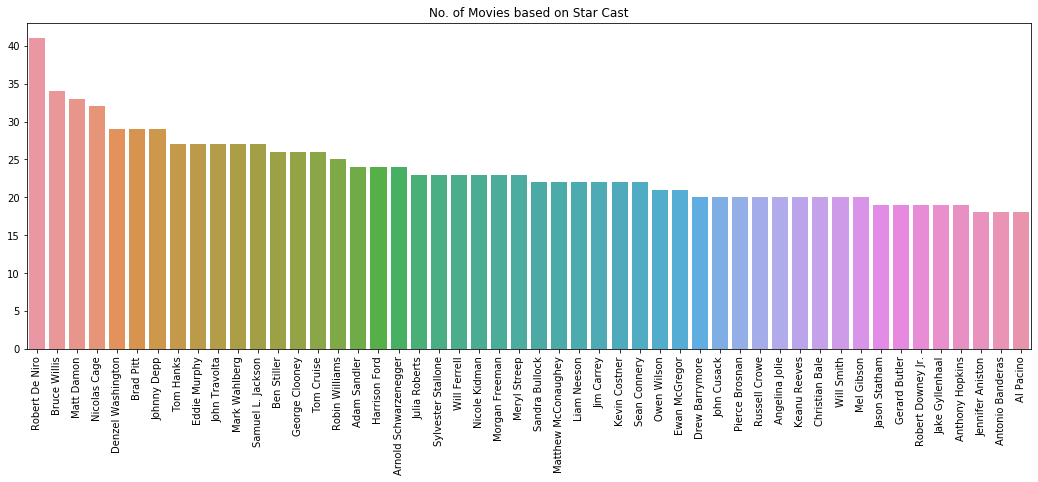

In [10]:
plt.figure(figsize=(18,6))
cast_list = pd.DataFrame(combine_df['cast_1'].tolist()  + combine_df['cast_2'].tolist(), columns=['cast'])
cast_list.drop(cast_list[cast_list['cast'] == 'NULL'].index, axis=0, inplace = True)
cast_list = cast_list['cast'].value_counts().head(50)
sns.barplot(x = cast_list.index, y=cast_list.values)
plt.xticks(rotation = 90)
plt.title("No. of Movies based on Star Cast")
plt.show()

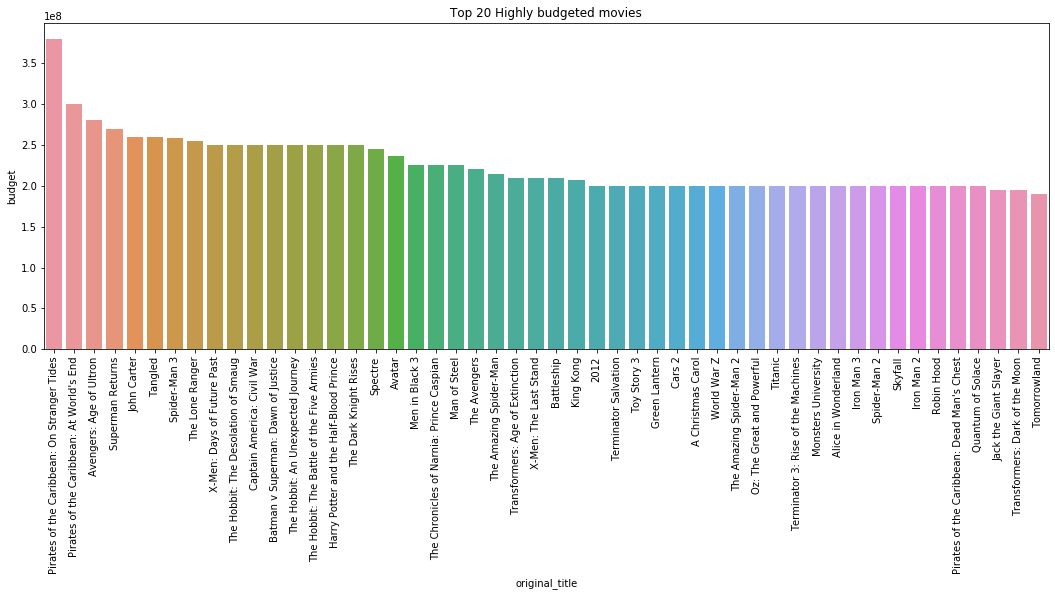

In [11]:
plt.figure(figsize = (18,6))
high_budget_movies = combine_df.sort_values(by='budget', ascending=False).head(50)
sns.barplot(x = high_budget_movies['original_title'],y = high_budget_movies['budget'])
plt.xticks(rotation = 90)
plt.title("Top 20 Highly budgeted movies")
plt.show()

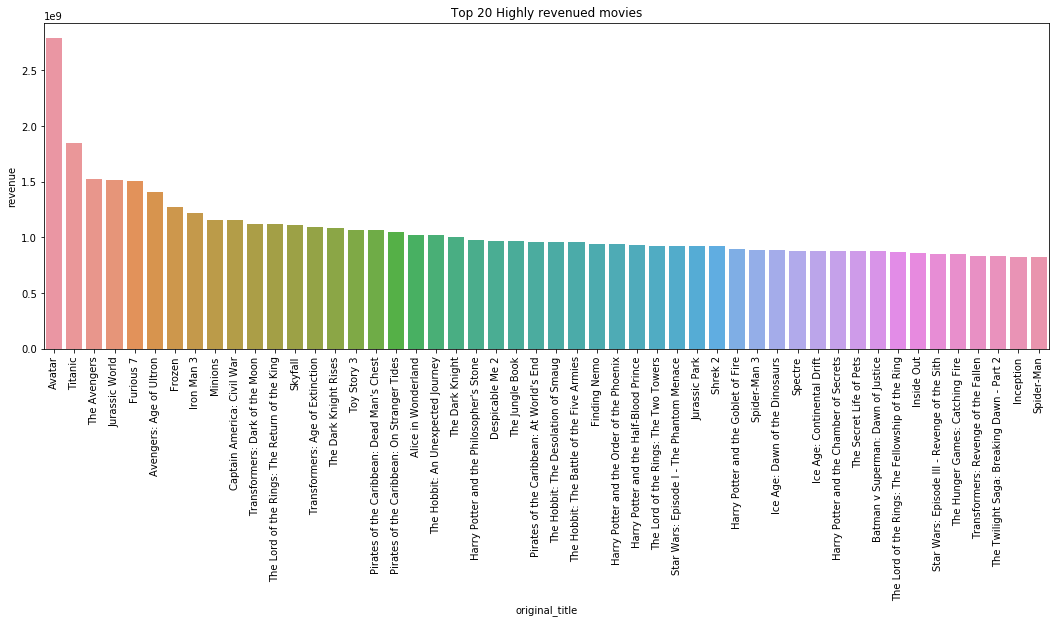

In [12]:
plt.figure(figsize = (18,6))
high_revenue_movies = combine_df.sort_values(by='revenue', ascending=False).head(50)
sns.barplot(x = high_revenue_movies['original_title'],y = high_revenue_movies['revenue'])
plt.xticks(rotation = 90)
plt.title("Top 20 Highly revenued movies")
plt.show()

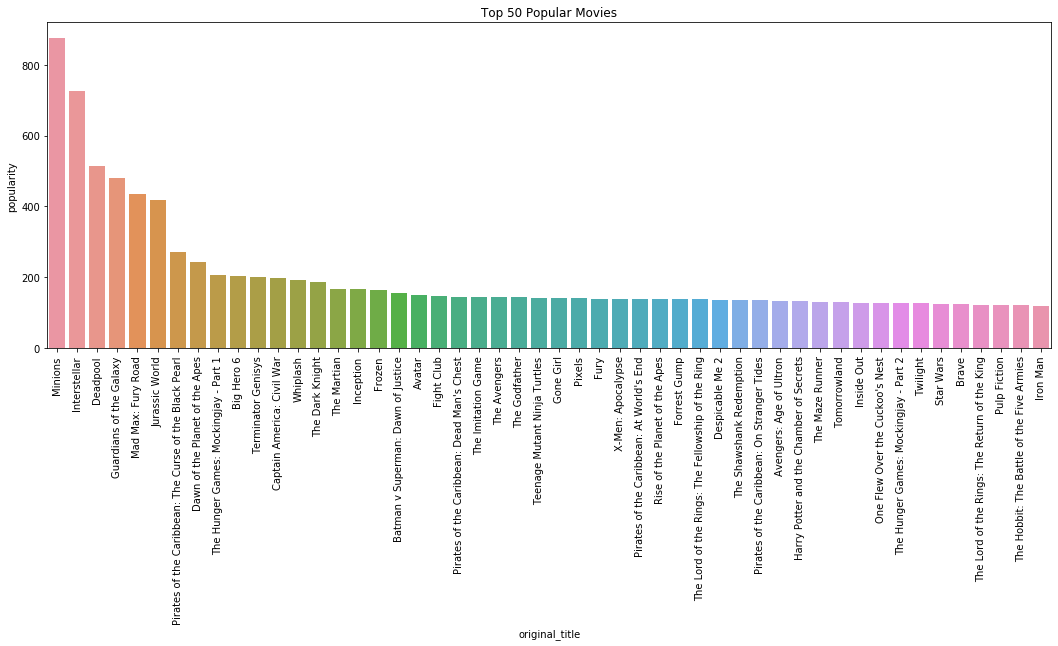

In [13]:
# Top 50 Movies by Popularity
plt.figure(figsize=(18,6))
popularity =combine_df.sort_values(by = 'popularity', ascending=False)[['popularity','original_title']].head(50).reset_index(drop=True)
sns.barplot(x = popularity['original_title'],y = popularity['popularity'])
plt.xticks(rotation = 90)
plt.title('Top 50 Popular Movies')
plt.show()

In [14]:
all_production_companies = []
def get_production_companies(x):
    production_companies = []
    x = eval(x)
    for i in np.arange(len(x)):
        all_production_companies.append(x[i].get('name'))
        production_companies.append(x[i].get('name'))
    return production_companies
combine_df['production_companies_1'] = combine_df['production_companies'].apply(lambda x : get_production_companies(x))

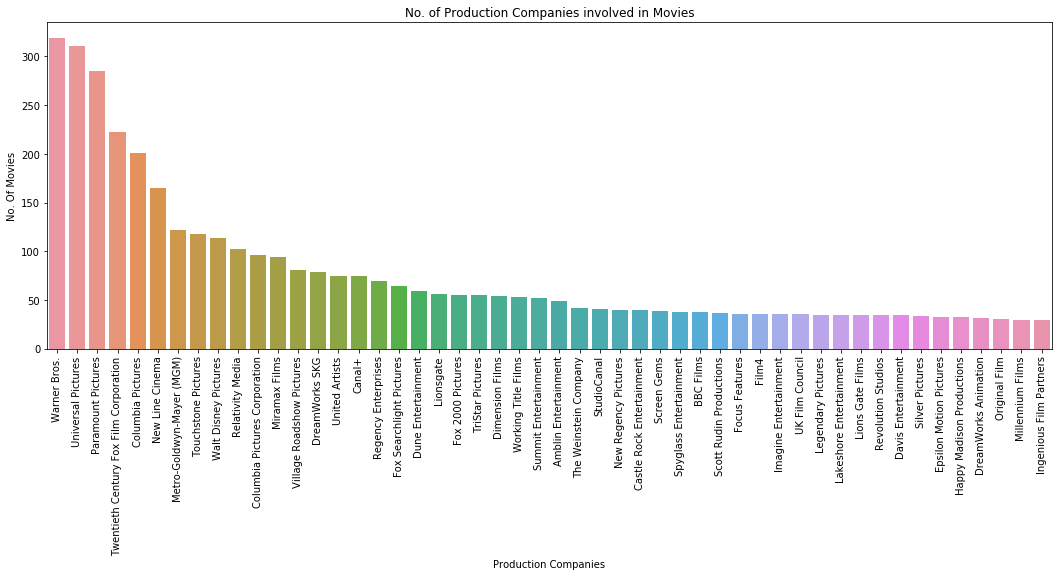

In [15]:
plt.figure(figsize=(18,6))
production_companies = pd.Series(all_production_companies).value_counts().head(50)
sns.barplot(x = production_companies.index,y =production_companies.values)
plt.xticks(rotation = 90)
plt.title('No. of Production Companies involved in Movies')
plt.xlabel("Production Companies")
plt.ylabel('No. Of Movies')
plt.show()

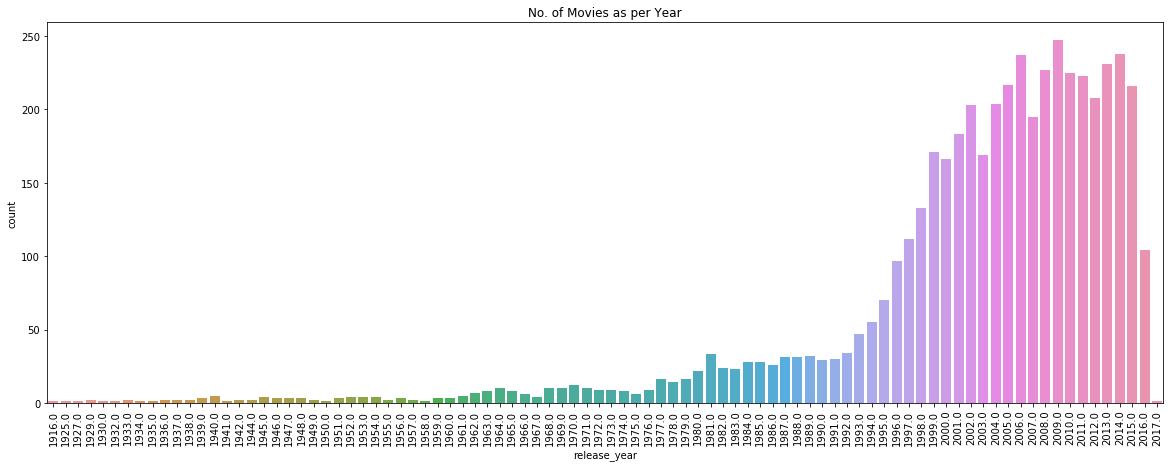

In [20]:
# Release Date
plt.figure(figsize=(20,7))
combine_df['release_date'] = pd.to_datetime(combine_df['release_date'])
combine_df['release_year'] = combine_df['release_date'].dt.year
combine_df['release_year'].dropna(inplace=True)
combine_df['release_year'] = combine_df['release_year'].astype(np.int64)
plt.title("No. of Movies as per Year")
sns.countplot(combine_df['release_year'])
plt.xticks(rotation =90)
plt.show()

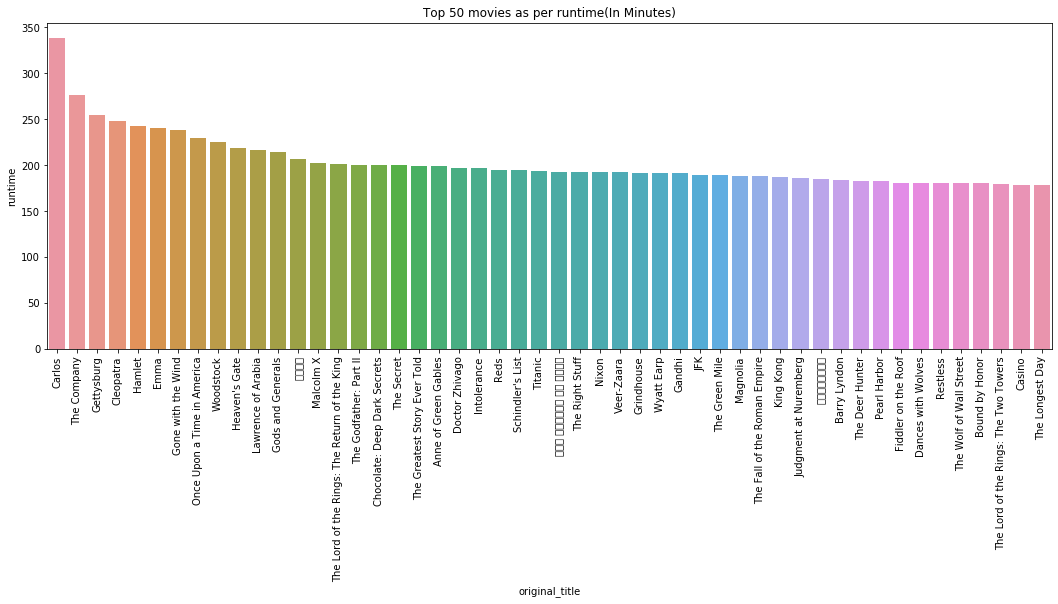

In [17]:
# Top 50 Movies as per run time
plt.figure(figsize=(18,6))
popularity =combine_df.sort_values(by = 'runtime', ascending=False)[['runtime','original_title']].head(50).reset_index(drop=True)
sns.barplot(x = popularity['original_title'],y = popularity['runtime'])
plt.xticks(rotation = 90)
plt.title('Top 50 movies as per runtime(In Minutes)')
plt.show()

In [18]:
# Maximum Number of votes received by movies
combine_df.sort_values(by='vote_count', ascending=False)[['original_title','vote_count','vote_average']].reset_index(drop= True).head(20)

,original_title,vote_count,vote_average
0,Inception,13752,8.1
1,The Dark Knight,12002,8.2
2,Avatar,11800,7.2
3,The Avengers,11776,7.4
4,Deadpool,10995,7.4
5,Interstellar,10867,8.1
6,Django Unchained,10099,7.8
7,Guardians of the Galaxy,9742,7.9
8,The Hunger Games,9455,6.9
9,Mad Max: Fury Road,9427,7.2


In [19]:
combine_df.to_csv('combine_df.csv', index=False)